In [54]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


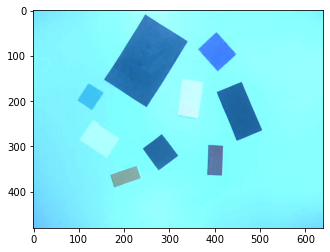

In [55]:
#image = cv2.imread("noir.png")
img = cv2.imread('noir.png')
#plt.imshow(img,cmap = 'gray')
plt.imshow(img)

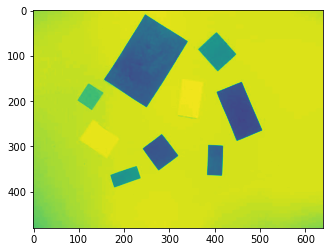

In [56]:
#image = cv2.imread("noir.png")
img2 = cv2.imread('noir.png', cv2.IMREAD_GRAYSCALE)
#plt.imshow(img,cmap = 'gray')
plt.imshow(img2)

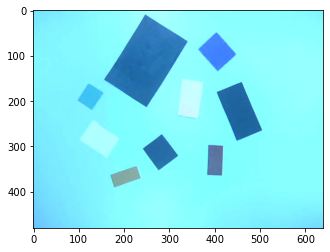

In [57]:
filtered_img = cv2.bilateralFilter(img,3,75,75)
plt.imshow(filtered_img, cmap = 'gray')

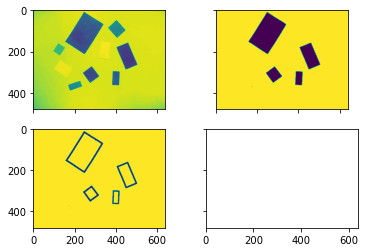

In [58]:
#on prend gray2 
gray = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)
ret, gray1 = cv2.threshold(gray,150,255,cv2.THRESH_BINARY)
gray2 = cv2.adaptiveThreshold(gray1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)


#gray2 = cv2.erode(gray1, (2,2), iterations = 1)
#gray3 = cv2.blur(gray2,(5,5))
#ret,gray = cv2.threshold(gray,60,255,cv2.THRESH_BINARY_IN)

#gray = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)
#ret,th4 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
#th2 = cv2.adaptiveThreshold(th4,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
##th3 = cv2.adaptiveThreshold(th4,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
#sobelx = cv2.Sobel(th2,cv2.CV_64F,1,0,ksize=5)
#sobely = cv2.Sobel(th2,cv2.CV_64F,0,1,ksize=5)
#sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0), 1.0, cv2.pow(sobely, 2.0), 1.0, 0.0))

#gray = cv2.erode(gray, (2,2), iterations = 1)
#gray = cv2.blur(gray,(5,5))
#th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
#ret,gray = cv2.threshold(gray,60,255,cv2.THRESH_BINARY_INV)
#contours, hierarchy = cv2.findContours(gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)



fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')

ax[0,0].imshow(gray)
ax[0,1].imshow(gray1)
ax[1,0].imshow(gray2)
#ax[1,1].imshow(gray3)




In [77]:
image = cv2.imread("rect.png")
#imcopy = image.copy()
template1 = cv2.imread('rectv.png')
_, w1, h1  = template1.shape[::-1]
res1 = cv2.matchTemplate(img,template1,3)
res1 = cv2.matchTemplate(img,template1,3) 
_, _, min_loc1, max_loc1 = cv2.minMaxLoc(res1)   #take min if TM_SQDIFF or TM_SQDIFF_NORMED
top_left1 = (max_loc1 , max_loc1[1] )
bottom_right1 = (top_left1[0] + w1, top_left1[1] +h1)
start_coordinates = (top_left1[0] - w1/2, top_left1[0] - h1/2)
cv2.rectangle(image,top_left1, bottom_right1, (255, 255, 255), -1)  #rect white, draw rectangle 2 opp corner top left and bottom right

#def detect_start(img):
#
#    template1 = cv2.imread('feuille_bleue.png')
#    #template2 = cv2.imread('feuille_vert.png')
#    _, w1, h1  = template1.shape[::-1]
#    #_, w2, h2  = template2.shape[::-1]
#    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
#    
#    
#    # Apply template Matching
#    res1 = cv2.matchTemplate(img,template1,3) 
#    _, _, min_loc1, max_loc1 = cv2.minMaxLoc(res1)   #take min if TM_SQDIFF or TM_SQDIFF_NORMED
#    top_left1 = (max_loc1[0], max_loc1[1])
#    bottom_right1 = (top_left1[0] + w1, top_left1[1] + h1)
#    start_coordinates = (top_left1[0] + w1/2, top_left1[0] + h1/2)
#
#    #res2 = cv2.matchTemplate(img,template2,cv2.TM_CCORR_NORMED) 
#    #_, _, min_loc2, max_loc2 = cv2.minMaxLoc(res2)   #take min if TM_SQDIFF or TM_SQDIFF_NORMED
#    #top_left2 = (max_loc2[0], max_loc2[1])
#    #bottom_right2 = (top_left2[0] + w2, top_left2[1] + h2)
#    #center2 = (top_left2[0] + w2/2, top_left2[0] + h2/2)
#
#
#    #start_coordinates = ((center1[0] + center2[0])/2, (center1[1] + center2[1])/2 )  #pour etre bien centre#
#    cv2.rectangle(img,top_left1, bottom_right1, (255, 255, 255), -1)  #rect white, draw rectangle 2 opp corner top left and bottom right
#    #cv2.rectangle(img,top_left2, bottom_right2, (0, 255, 0), -1)  #rect white, draw rectangle 2 opp corner top left and bottom right
#    
#    
#    return start_coordinates,copy,res1,res2
#
#
#def detect_target(copy):
#    template = cv2.imread('feuille_rouge.png')
#    _, w, h  = template.shape[::-1]
#    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
#    
#    img = image.copy()
#    # Apply template Matching
#    res = cv2.matchTemplate(copy,template,cv2.TM_CCORR_NORMED)  #TM_SQDIFF
#    _, _, min_loc, max_loc = cv2.minMaxLoc(res)   #take min if TM_SQDIFF or TM_SQDIFF_NORMED
#
#    top_left = (max_loc[0], max_loc[1])
#    bottom_right = (top_left[0] + w, top_left[1] + h)
#    target_coordinates = (top_left[0] + w/2, top_left[1] + h/2)
#    cv2.rectangle(img,top_left, bottom_right, (255, 0, 0), -1)  #rect blue, draw rectangle 2 opp corner top left and bottom right
#
#    return target_coordinates,copy,res


#start_coor, img_start, res_start1,res_start2 = detect_start(image)
#target_coor, img_target, res_target = detect_target(img_start)

print(start_coor)
print(top_left1)
print(bottom_right1)
#print(target_coor)



fig, (ax1)  = plt.subplots(1, 1,sharey='row')
ax1.imshow(image)
#ax2.imshow(img_start)
#ax3.imshow(img_target)


TypeError: can only concatenate tuple (not "int") to tuple

In [74]:
def get_image():
    cap = cv2.VideoCapture(0)
    result,image = cap.read()

    if result:
        # save the image
        cv2.imwrite("rect.png", image)
        print("here")
    else:
        print("no image read")
    
    return image

a = get_image()
print("done")

here
done
